# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [56, 143, 53]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
print "Chosen samples of wholesale customers dataset compared to mean:"
display(samples - np.round(data.mean()))
print "Chosen samples of wholesale customers dataset compared to median:"
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4098,29892,26866,2616,17740,1340
1,10405,1596,1096,8425,399,318
2,491,10473,11532,744,5611,224


Chosen samples of wholesale customers dataset compared to mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-7902.0,24096.0,18915.0,-456.0,14859.0,-185.0
1,-1595.0,-4200.0,-6855.0,5353.0,-2482.0,-1207.0
2,-11509.0,4677.0,3581.0,-2328.0,2730.0,-1301.0


Chosen samples of wholesale customers dataset compared to median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-4406.0,26265.0,22110.0,1090.0,16924.0,374.0
1,1901.0,-2031.0,-3660.0,6899.0,-417.0,-648.0
2,-8013.0,6846.0,6776.0,-782.0,4795.0,-742.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
- **Sample 1**: The first establishment we see orders of Milk, Grocery and Detergents_Paper to be 24096.0, 18915.0 and 14859.0 respectively, above the mean values of those items, giving the notion that it is a super-market with a large customer base, probably in a populous neighbourhood, evident from their ordering amount.
- **Sample 2**: The second establishment shows Fresh, -1595.0 and Frozen, 5353.0 above the mean as their largest orders with smaller amounts of others. Let's not consider the Fresh he is ordering to be less because it falls below the global mean and that too not very significantly, but lets' compare it with the other items he orders. Thus, it might be a retailer aimed at providing more Fresh produce and Frozen than other items.
- **Sample 3**: The third establishment orders Milk, Grocery and Detergents_Paper to be 4677.0, 3581.0 and 2730.0 resp. above the mean and but Fresh and Delicatessen are -11509.0 and 1301.0 (resp.) below the mean and that is a significant difference. Thus, it stands out as a cafe. It is even more evident from the fact that it requires a large amount of Detergent papers probably to do the dishes in the kitchen.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
new_data = data.drop('Fresh', axis = 1)


# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split

features = new_data
labels = data['Fresh']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state= 43)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
scores = regressor.score(X_test,y_test)
print scores
print 'Dataset description without Fresh:'
display(new_data.describe())

-0.305026648904
Dataset description without Fresh:


,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000
mean,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 
- I attempted to predict the 'Fresh' feature. 
- The reported prediction score was -0.305026648904.
- The distinctly negative R^2 score shows that we could find the customer's spending from this feature alone to some extent. Also, intuitively, it is necessary for identifying a customer's spending habits because Fresh produce is something that doesn't have a very long shelf life and hence has to be sold very quickly. So if the customer buys a lot of fresh produce, it is likely that they shall use it quickly too. Thus, in turn showing that they themselves might have a large customer base and probably they shall end up buying large amounts of other products too (as is evident from the first two samples) for their own customers.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

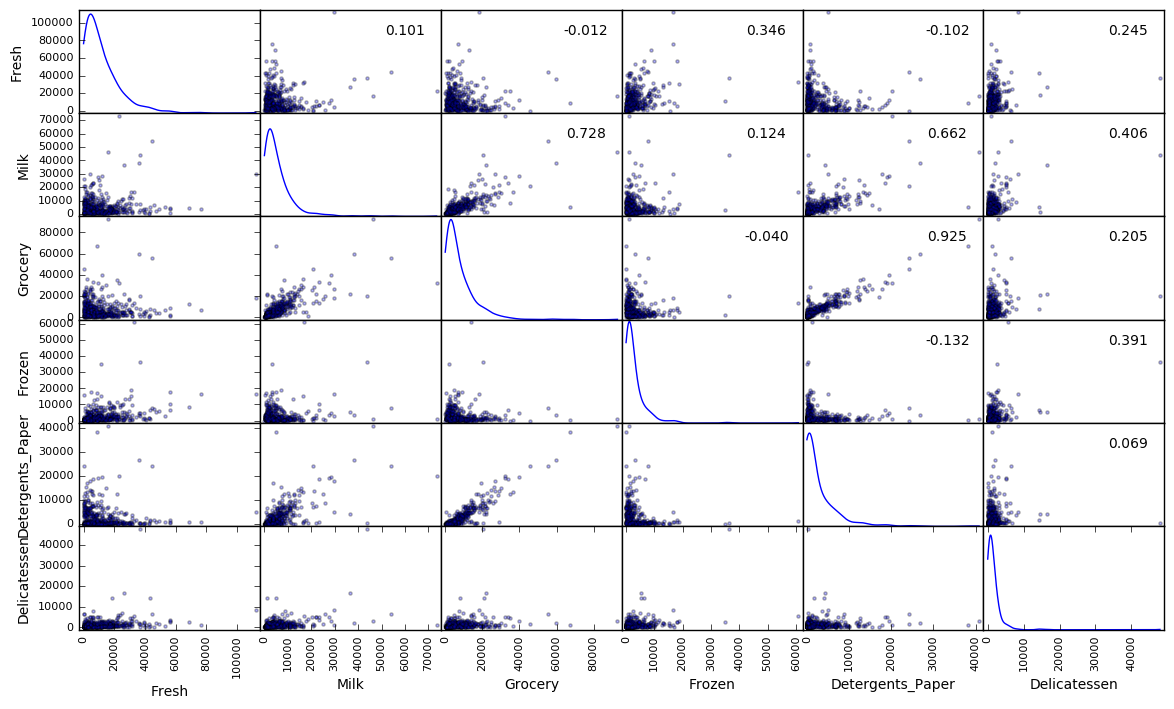

In [5]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes, there are three pairs of features that exhibit atleast some degree of correlation.
- Grocery and Detergents_Paper show a strong correlation because it looks like it is very much possible to fit a best-fit line through the data as most of the data is linear with a very high numerical correlation of 0.925.
- Grocery and Milk also show correlation although it's weaker than the first pair mentioned above as the data is a bit more scattered from a general linear trend but it still shows a good numerical correlation of 0.728.
- Milk and Detergents_Paper also show a somewhat linear trend with a numerical correlation of 0.662.

Hence, my conjecture about Fresh being a relevant feature is confirmed as it doesn't show correlation between any of the other features and has a more scattered distribution than a linear trend. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

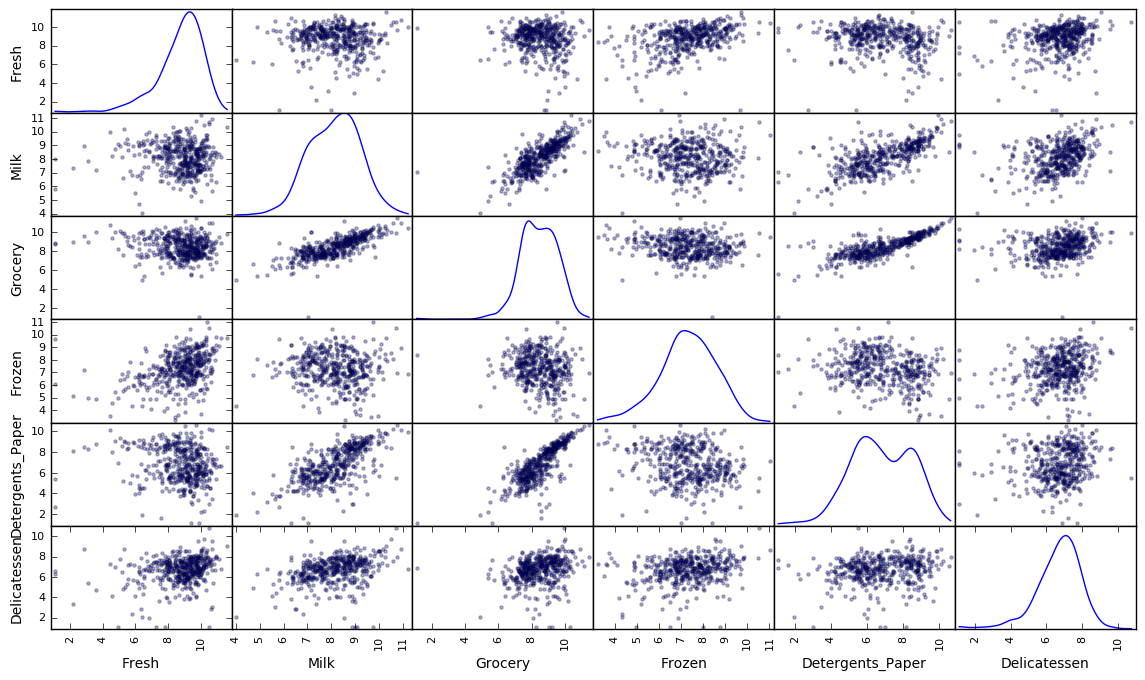

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.318254,10.305346,10.198617,7.869402,9.783577,7.200425
1,9.250042,7.375256,6.999422,9.038959,5.988961,5.762051
2,6.196444,9.256556,9.352881,6.612041,8.632484,5.411646


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [35]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
### Please check the code for outlier removal. I am able to get the outliers but not the common ones. The outliers added to 
### the list are done manually by weeding them out from the tables of each feature.
    
    #outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    #outliersList += outlier
    
# OPTIONAL: Select the indices for data points you wish to remove
#totaloutliers = list(set(outliersList))
#for i in range(0, len(totaloutliers)):
#    if totaloutliers.count(totaloutliers[i]) > 1:
#        outliers += totaloutliers
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** 
- Yes index 65, 66, 75, 128 and 154 are outliers for more than one feature.
- Yes, they should be removed from the dataset because they represent very extreme values which deviate far away from the majority of the data points and tend to pull the mean towards themselves resulting in skewed representation of mean expenditure of a customer.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


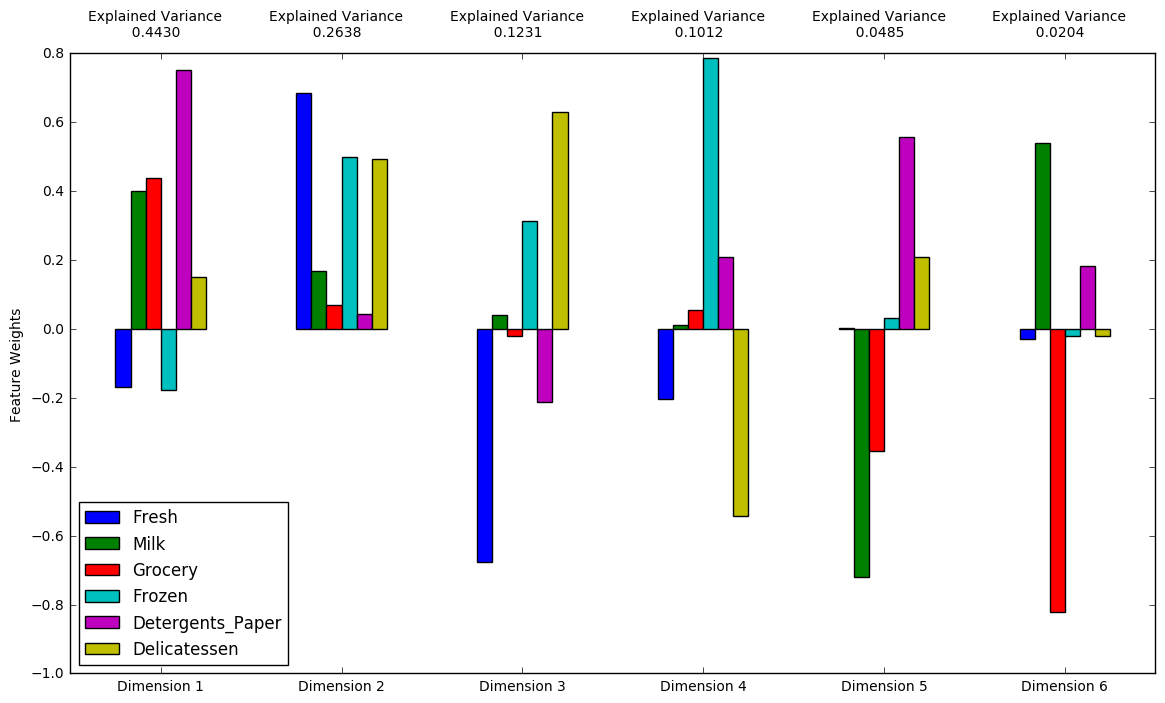

In [36]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
- Variance **in total** explained by first and second principal component = 0.70681723
- Variance **in total** explained by first four principal components = 0.93109011
- The first dimension indicates customer spending money mostly on Milk, Grocery and Detergents_Paper all of which we have already found to be correlated to one another. So, if the customer buys more of any of those three, they also buy more of the other amounts too.
- The second dimension indicates customer expenditure depending on Fresh, Frozen and Delicatessen and a small amount of importance of the other features too, which earlier in the first dimension played the major role but are now given very small weightage.
- The third dimension shows customer expenditure depending mostly on Fresh and Detergents_Paper and a very small positive weightage is given to Grocery while negative weights are given to the other features.
- The fourth dimension shows customers spending almost entirely on Frozen, with small amounts in Detergents_Paper and almost negligible positive weight is given to grocery and milk while Fresh and Delicatessen have negative weights indicating as the customers buy more of others, the sale of Fresh and Delicatessen decreases.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.9321,0.8289,0.2152,0.9953,-0.3950,0.2858
1,-2.0772,0.4653,-0.2036,1.4926,0.4717,0.6132
2,2.5869,-2.4239,0.3501,1.1095,-0.4039,0.3263


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.9321,0.8289
1,-2.0772,0.4653
2,2.5869,-2.4239


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

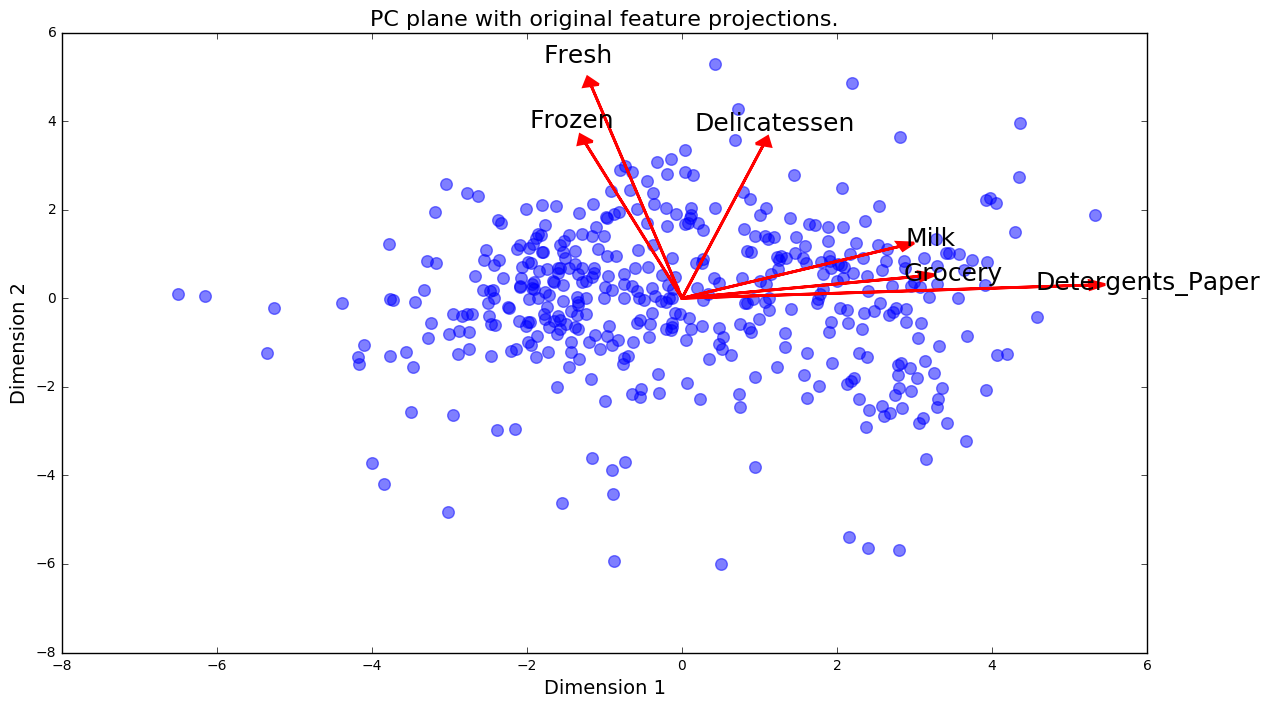

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** 
- The advantages to using a K-means clustering algorithm is that given enough time, it shall always converge although that might be to a local minima and that occurs because K-means assigns hard clusters i.e., a data point has to compulsorily belong to either of the groups and a cluster is assigned based on the initial conditions, but that problem can be taken care of by altering the number of initializations parameter of the K-means classifier. Thus we see it is consistent. It is also less computationally expensive and gives us the control of choosing the number of clusters we want. 
- The advantages to using a Gaussian Mixture model is that instead of considering Euclidean distances like in K-means, we consider Mahalonabis distances and since that is scale-invariant, it is good for the algorithm. Also, it uses soft clustering in which the data point may belong to one or more clusters instead of hard-assigning it to only one cluster, that is, instead of coming from one cluster, the point may probabilistically come from any number of possible clusters.

Given the information about the wholesale customer data so far I would use K-means since it is computationally less expensive and gives me the flexibility to choose the number of clusters I want. Also, K-means is ideal when we don't want too many clusters. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
print 'Printing Silhouette Scores:'
for k in range(2,7):
    clf = KMeans(n_clusters = k, random_state = 43)
    clusterer = clf.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data,preds)
    print score

clf = KMeans(n_clusters = 2, random_state = 43)
clusterer = clf.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

Printing Silhouette Scores:
0.426281015469
0.397138208845
0.331245916061
0.350990778931
0.360861414321


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Silhoutte scores for:
- 2 clusters: 0.426281015469
- 3 clusters: 0.397138208845
- 4 clusters: 0.331245916061
- 5 clusters: 0.350990778931
- 6 clusters: 0.360861414321

Of these the silhoutte score of 2 clusters is the best.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

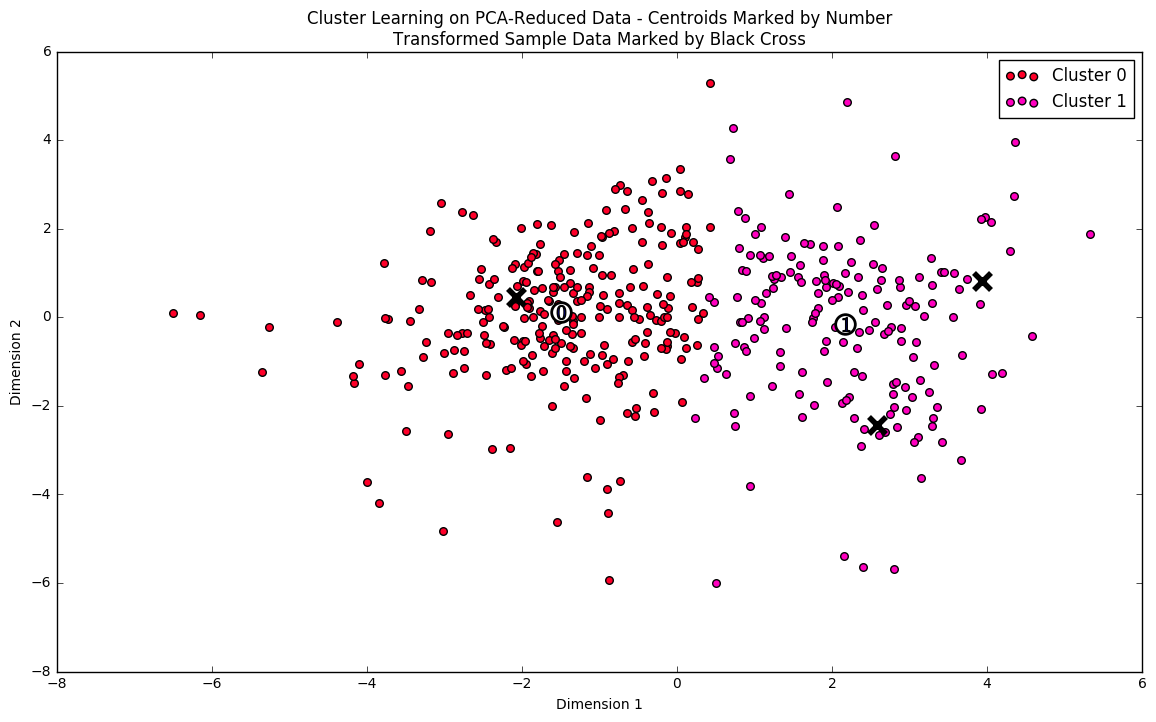

In [26]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


True centres:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


True centres compared to mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.0,-3899.0,-5474.0,-984.0,-2587.0,-844.0
Segment 1,-7995.0,2104.0,4153.0,-2120.0,1680.0,-489.0


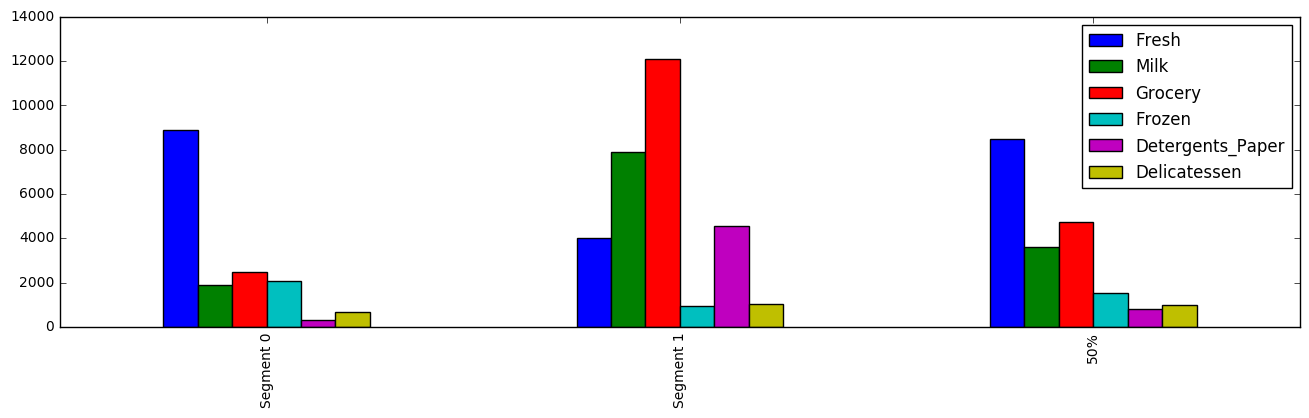

In [34]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print 'True centres:'
display(true_centers)
print 'True centres compared to mean:'
display(true_centers - np.round(data.mean()))

true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 
- Customers belonging to Segment 0 spend a lot on Fresh which is evident from the fact that it's value is just -3133.0 away from the mean of Fresh (which is very high), and relatively lesser on Milk, Grocery and Frozen, their values being -3899.0, -5474.0 and -984.0 resp., away from their means. Negligible spending is done on Detergents_Paper as it  falls -2587.0 compared to the mean so it might be a retailer's establishment since the Milk and Grocery hardly compare to the super-market levels of quantities.
- Segment 1 looks more like a large restaurant or a market judging by the copious amounts of Grocery, Milk and Detergents Paper being used as their values 2104.0, 4153.0 and 1680.0 resp., are appreciably above their respective means. This segment is also characterized by their low Fresh usage as it's value -7995.0 is when compared to the mean.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [37]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])

Sample point 0 predicted to be in Cluster 1
The distance between sample point 0 and center of cluster 1:
Fresh                  93.0
Milk                21992.0
Grocery             14762.0
Frozen               1664.0
Detergents_Paper    13179.0
Delicatessen          304.0
dtype: float64
Sample point 1 predicted to be in Cluster 0
The distance between sample point 1 and center of cluster 0:
Fresh               1538.0
Milk                -301.0
Grocery            -1381.0
Frozen              6337.0
Detergents_Paper     105.0
Delicatessen        -363.0
dtype: float64
Sample point 2 predicted to be in Cluster 1
The distance between sample point 2 and center of cluster 1:
Fresh              -3514.0
Milk                2573.0
Grocery             -572.0
Frozen              -208.0
Detergents_Paper    1050.0
Delicatessen        -812.0
dtype: float64


**Answer:**
- Sample point 0 was a super-market establishment according to me based on the huge amount of items ordered by them and the predictions put it in Cluster 1 which also shows the same thing as it contains large amounts of Grocery, Milk and Detergents_Paper which we can clearly see by their large deviations (Milk: 21992; Grocery: 14762.0; Detergents_Paper: 13179.0) from the centroid of Cluster 1
- Sample point 1 was predicted to be a retailer selling mostly fresh produce, by me based on the moderate but decent quantities of items ordered by them and the predictions put it in Cluster 0 which also shows the same thing with high quantities of Fresh evident by its appreciable positive deviation from the cluster centroid (1538.0) and relatively low but decent quantities of Milk and Grocery in it with deviations of -301.0 and -1381.0 resp. from the centroid of Cluster 0.
- Sample point 2 was predicted by me to be a cafe based on the lower ordering amounts of Fresh (deviation of -3514.0 from cluster centroid) but relatively higher amounts of Milk and Grocery (with deviations of 2573.0 and -572.0 resp.) and Detergents_Paper (deviation of 1050.0 from cluster centroid) which I inferred earlier, was probably for the cleaning of utensils. It is predicted in cluster 1 also with the large amounts of Milk, Grocery and Detergents_Paper.

Thus both the segments are not purely of 'Retailer' or 'Cafe' or 'Super-market' type. Yes, the majority maybe of one type but they contain atleast some, which may belong to some other group.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The changes shall not affect all the customers equally. Instead of changing the delivery scheme for everyone together, the wholesale distributor should run the A/B test, by selecting a small group of customers from each segment and testing the delivery service on them for a week so that they can determine how it would affect the entire segment. Thus, the distributor could determine what delivery service to schedule for which segment based on the reactions of the two segments.

If I had to guess by intuition, I would that customers of Segment 0 would not react positively to this change in delivery service because their order mostly consists of large quantities of Fresh produce. Now Fresh is something that requires daily delivery for it to be considered *fresh*, failing which it wouldn't make any sense to order those items anymore. Yes, they might still order Milk or Grocery since they were being ordered in decent amounts too but they shall verily, cancel the order for the Fresh and thus, by and large, since Segment 0 was mostly characterized by large amounts of Fresh, the wholesale distributor would face a huge amount of loss from all of those customers.

Customers of Segemnt 1 however, wouldn't be so upset because the items they mostly order i.e., Milk, Grocery and Detergents Paper are items that can be stored over a couple of days and be sold without any issues and thus if the delivery scheme changes, they might just order larger amounts so that it lasts for 2 days and continue on without facing any problems.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** When conducting the A/B test, the customer could label each customer from either groups as being satisfied or unsatisfied with the new delivery scheme a new "Satisfaction" feature can created. A supervised learner can be used to train on this labeled data and when making the decision for the delivery scheme for the new customers, "Satisfaction" can be the target variable, hence making an informed decision for the new customers.

Another thing that could be done was instead of adding a new feature, the distributor could check the delivery scheme on a small group from the two segments of customers and determine whether or not they like it. This helps the distributor get a general idea about the requirements of the entire segment to a great extent. Now, when we get the new data for the 10 customers, this could be treated as a supervised classification problem where the supervised learner would be trained on the two segments which would be the output labels and the features and their values within would be the data. The 10 new customers would be assigned to either of categories by the supervised model and when we know which segment they belong to, we could provide them with the same delivery scheme as we did from our experiment earlier on the small group from that segment.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

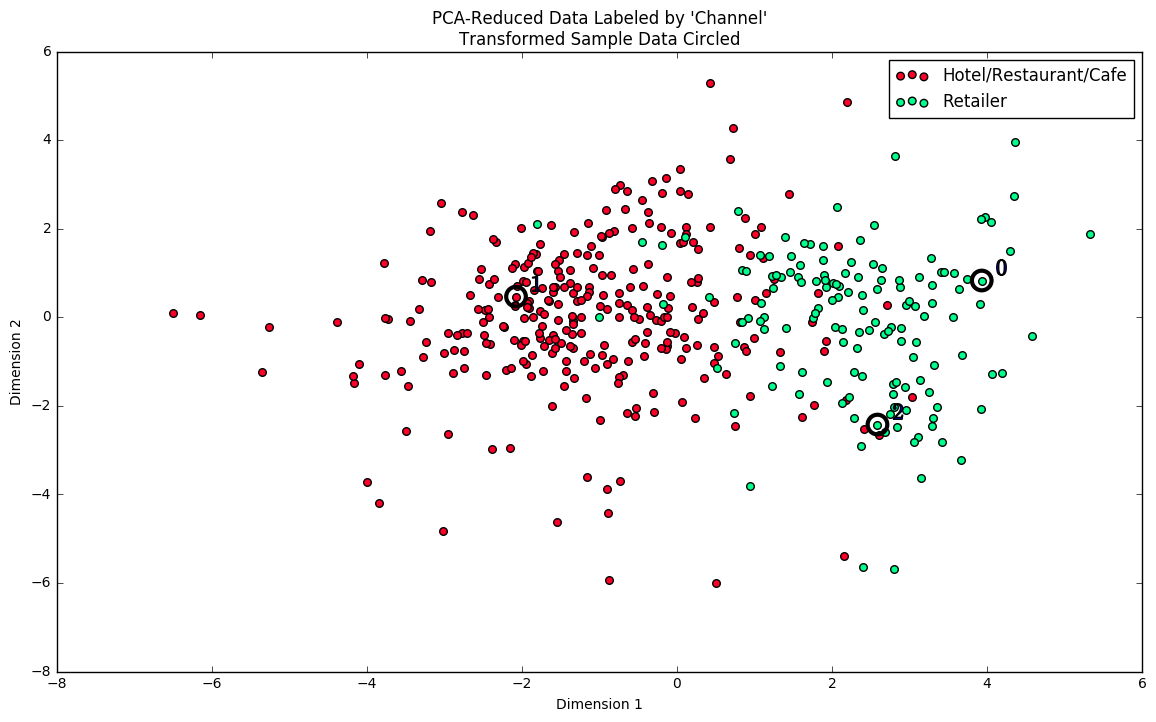

In [29]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The K-means algorithm that I used with 2 clusters based on the Silhoutte score performs very good when compared to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers which used 3 clusters. 

None of the segments are purely 'Retailers' or 'Hotels/Restaurants/Cafes' according to this distribution as all the segments have atleast some points, maybe a bare minimum but still some points that belong to either of the groups and thus classifying one segment purely into either of the categories would be incorrect. This is consistent with my previous definition based on the output of the clustering algorithm that neither of the segments contain all the customers of any one particular type.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.